In [38]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [48]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS=3
EPOCHS=50

In [49]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle= True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [50]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [51]:
len(dataset)

68

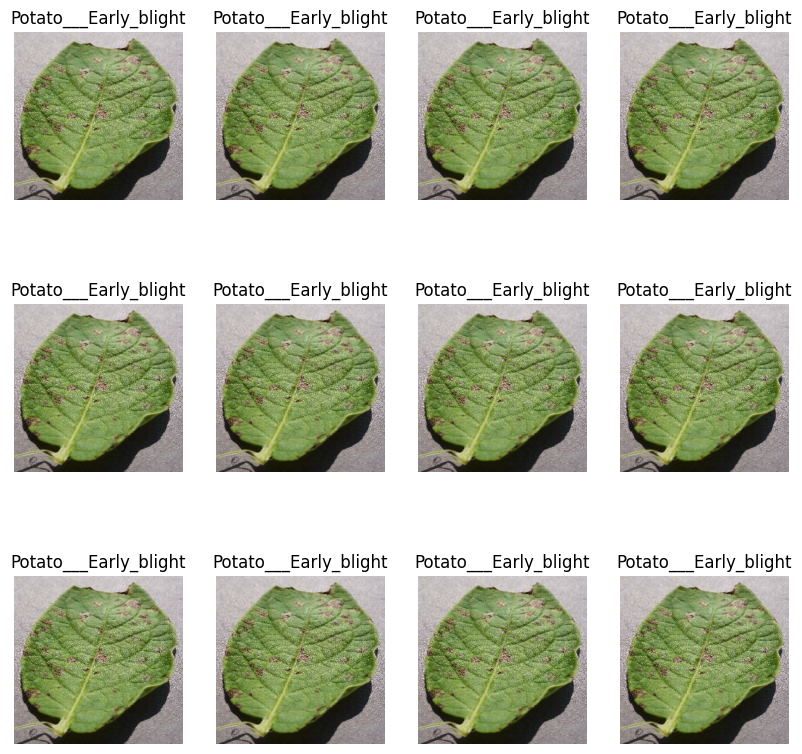

In [52]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i + 1)
        plt.imshow(image_batch[0].numpy().astype("uint8"))
        plt.title(class_names[label_batch[0]])
        plt.axis("off")

In [53]:
80% ==> training
20% ==> 10% validation, 10% test

SyntaxError: invalid syntax (829920516.py, line 1)

In [56]:
train_size = 0.8
len(dataset) * train_size


54.400000000000006

In [57]:
train_ds = dataset.take(54)
len(train_ds)

54

In [58]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [59]:
val_size=0.1
len(dataset) * val_size

6.800000000000001

In [60]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [61]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [62]:
def get_dataset_partitions_tf(ds, train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True, shuffle_size=10000):

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
        
    train_size = int(train.split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)

    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [63]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

NameError: name 'train' is not defined

In [30]:
len(train_ds)

54

In [31]:
len(val_ds)

6

In [45]:
len(test_ds)

8

In [47]:
train_ds = train_ds.cache().shuffle(1000),prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000),prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000),prefetch(buffer_size=tf.data.AUTOTUNE)

NameError: name 'prefetch' is not defined

In [39]:
resize_and_rescale = tf.keras.Sequential({
    layers.experimental.preprocessing.Rescaling(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
})

TypeError: The added layer must be an instance of class Layer. Received: layer={<keras.src.layers.preprocessing.image_preprocessing.Rescaling object at 0x00000166F913E350>, <keras.src.layers.preprocessing.image_preprocessing.Rescaling object at 0x00000166F913E4D0>} of type <class 'set'>.

In [40]:
data_augmentation = tf.keras.Sequential({
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
})

TypeError: The added layer must be an instance of class Layer. Received: layer={<keras.src.layers.preprocessing.image_preprocessing.RandomFlip object at 0x00000166F913EF80>, <keras.src.layers.preprocessing.image_preprocessing.RandomRotation object at 0x00000166F913F0A0>} of type <class 'set'>.

In [42]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential({
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
})

model.build(input_shape=input_shape)

NameError: name 'resize_and_rescale' is not defined

In [43]:
model.summary()

NameError: name 'model' is not defined

In [ ]:
dd